In [2]:
from comsol.model import MLP
from comsol.utils import Config, Trainer
from comsol.datasets import FieldDataset
from comsol.datasets import BDDataset
from comsol.utils import EarlyStop
import torch
import numpy as np
from config import fontsize, ticksize
import os

os.chdir("E:/code/comsol")

In [ ]:
exps = "exports/slit-9-1/params_del_bad.csv"
config = "config/cell_local.yaml"
ckpt_path = "ckpt"

cfg = Config(config)
dataset = BDDataset(exps)
model = MLP(cfg)
trainer = Trainer(dataset, model, cfg, ckpt_path)
try:
    trainer.train()
except (KeyboardInterrupt, EarlyStop):
    trainer.save_ckpt(f"earlystop_best_{trainer.best_loss:.6f}", best=True)
train_losses = trainer.train_losses
test_losses = trainer.test_losses

In [ ]:
train_losses

In [ ]:
len(test_losses), len(train_losses)

In [8]:
# 对test_losses进行插值
x_train = np.arange(len(train_losses))
x_test = np.linspace(0, len(train_losses) - 1, len(test_losses))
test_losses_interp = np.interp(x_train, x_test, test_losses)

In [3]:
import pickle

In [ ]:

# with open("notebooks/plots/loss/losses.pkl", "wb") as f:
#     pickle.dump((train_losses, test_losses_interp), f)

In [4]:
train_losses, test_losses_interp = pickle.load(open("notebooks/plots/loss/losses.pkl", "rb"))

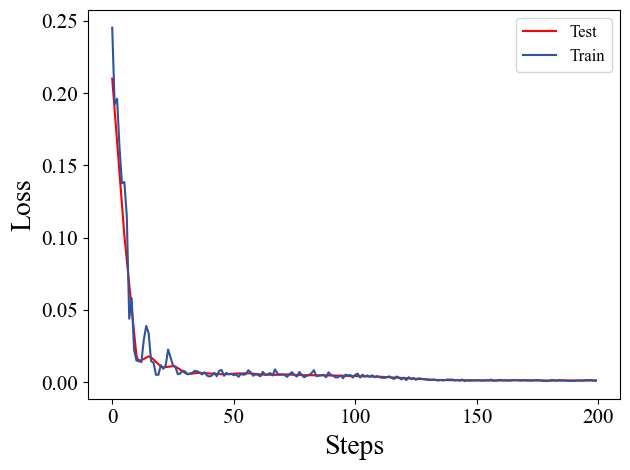

In [5]:
from matplotlib import pyplot as plt
colors = {
    "blue": "#2E54A1",
    "green": "#249087",
    "red": "#FF0000"
}
plt.rcParams["legend.fontsize"] = 'large'
plt.rcParams["font.family"] = 'Times New Roman'
plt.plot(test_losses_interp[:200], label="Test", color=colors["red"])
plt.plot(train_losses[:200], label="Train", color=colors["blue"])
plt.tick_params(axis='both', labelsize=ticksize)
plt.ylabel("Loss", fontsize=fontsize)
plt.xlabel("Steps", fontsize=fontsize)
plt.legend()
plt.tight_layout()
plt.savefig("notebooks/plots/figures/fig3b_loss.pdf")
plt.show()